In [6]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pickle
import torch
dataset=torch.load('dataset/dataset_final.pkl')


In [2]:
my_list=[]
for item in dataset:
    my_list.append(item)

In [19]:
import random
sample_size = int(len(my_list) * 0.0001)

# Select a random 10% of elements from the list
random_sample = random.sample(my_list, sample_size)

In [20]:
len(random_sample)

322

In [5]:
from transformers import BertTokenizer, LineByLineTextDataset

vocab_file_dir = 'dataset/rna_vocabs.txt' 

tokenizer = BertTokenizer.from_pretrained(vocab_file_dir)

sentence = 'A U C G A'

encoded_input = tokenizer.tokenize(sentence)
print(encoded_input)

['a', 'u', 'c', 'g', 'a']


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1743: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [6]:
from transformers import BertConfig, BertForMaskedLM, DataCollatorForLanguageModeling

config = BertConfig(
    vocab_size=9,
    hidden_size=128, 
    num_hidden_layers=6, 
    num_attention_heads=8,
    max_position_embeddings=1024
)
 
model = BertForMaskedLM.from_pretrained('Model/')
print('No of parameters: ', model.num_parameters())


data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

No of parameters:  5286665


In [7]:
from transformers import BertModel
from transformers import BertConfig, BertForMaskedLM, DataCollatorForLanguageModeling

model = BertModel.from_pretrained("Model/")


input_text="a u c g a a c g"
encoded_text = tokenizer.encode(input_text, return_tensors='pt')
print(encoded_text)
output=model(encoded_text)["last_hidden_state"][0]
output.shape

Some weights of BertModel were not initialized from the model checkpoint at Model/ and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[2, 5, 6, 7, 8, 5, 5, 7, 8, 3]])


torch.Size([10, 128])

In [21]:
data

tensor([[8, 7, 5, 8, 6, 5, 8, 7, 6, 7, 5, 8, 6, 8, 8, 6, 5, 8, 5, 8, 7, 6, 7, 7,
         7, 8, 7, 6, 6, 7, 8, 6, 5, 7, 5, 7, 8, 8, 8, 5, 5, 8, 5, 7, 5, 6, 8, 8,
         8, 6, 6, 7, 8, 5, 6, 6, 7, 6, 7, 8, 8, 7, 6, 8, 7]], device='cuda:0')

In [56]:
all_output=[]
all_label=[]
i=1
device=torch.device('cuda')
model=model.to(device)

for item in random_sample:
    if(i%100==0):
        print(i)
    i+=1
    data=item['input_ids']
    data=data[1:-1]
    for label in data:
        all_label.append(label.item())
    data=data.reshape(1,data.shape[0])
    data=data.to(device)
    with torch.no_grad():
        output=model(data)["last_hidden_state"][0]
    
    for embed in output:
        all_output.append(embed)
        
    
    
    
    

100
200
300


In [57]:
all_label

[6,
 7,
 7,
 6,
 7,
 5,
 8,
 6,
 5,
 8,
 7,
 6,
 7,
 5,
 8,
 6,
 8,
 8,
 6,
 5,
 8,
 5,
 8,
 7,
 8,
 8,
 6,
 7,
 8,
 8,
 7,
 6,
 8,
 6,
 6,
 5,
 5,
 7,
 6,
 8,
 5,
 7,
 6,
 8,
 8,
 6,
 7,
 8,
 6,
 5,
 8,
 8,
 6,
 6,
 7,
 5,
 5,
 5,
 6,
 7,
 7,
 6,
 5,
 7,
 6,
 6,
 8,
 8,
 8,
 8,
 5,
 8,
 8,
 8,
 8,
 8,
 5,
 6,
 6,
 6,
 5,
 8,
 7,
 6,
 7,
 5,
 8,
 6,
 8,
 8,
 6,
 5,
 8,
 5,
 8,
 7,
 8,
 7,
 6,
 6,
 8,
 7,
 7,
 6,
 5,
 8,
 5,
 5,
 5,
 8,
 7,
 8,
 7,
 5,
 5,
 8,
 8,
 7,
 7,
 7,
 6,
 8,
 5,
 8,
 6,
 6,
 7,
 5,
 8,
 6,
 7,
 7,
 7,
 7,
 5,
 8,
 7,
 5,
 8,
 8,
 6,
 8,
 6,
 8,
 8,
 6,
 6,
 7,
 5,
 5,
 6,
 8,
 8,
 6,
 5,
 8,
 5,
 5,
 7,
 5,
 6,
 7,
 5,
 8,
 7,
 7,
 6,
 6,
 7,
 7,
 5,
 5,
 8,
 7,
 6,
 8,
 5,
 5,
 6,
 5,
 7,
 8,
 6,
 8,
 8,
 8,
 6,
 6,
 7,
 8,
 5,
 6,
 6,
 7,
 7,
 7,
 5,
 6,
 7,
 5,
 7,
 7,
 6,
 8,
 7,
 6,
 6,
 5,
 6,
 5,
 5,
 8,
 6,
 5,
 6,
 5,
 8,
 6,
 6,
 7,
 6,
 8,
 7,
 5,
 6,
 5,
 6,
 7,
 7,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 8,
 5,
 7,
 6,
 8,
 6,
 6,
 7,
 8,
 6,
 6,
 6,
 6,
 5,


In [61]:
excluded=[]
for i in range(len(all_label)):
    if(all_label[i]<5):
        excluded.append(i)

In [64]:
all_output = [element for i, element in enumerate(all_output) if i not in excluded]
all_label = [element for i, element in enumerate(all_label) if i not in excluded]
all_label=[x - 5 for x in all_label]

In [65]:
unique_values = list(set(all_label))
print(unique_values)  # Output: [1, 2, 3, 4, 5, 6]

[0, 1, 2, 3]


In [66]:
import numpy as np
all_output_matrix=np.zeros((len(all_output),128))
for i in range (len(all_output)):
    all_output_matrix[i]=all_output[i].to(torch.device('cpu'))

In [67]:
all_output_matrix.shape

(34054, 128)

In [68]:
len(all_label)

34054

In [48]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.manifold import TSNE
from numpy import reshape
import pandas as pd
import seaborn as sns


In [69]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(all_output_matrix) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 34054 samples in 0.005s...
[t-SNE] Computed neighbors for 34054 samples in 1.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34054
[t-SNE] Computed conditional probabilities for sample 2000 / 34054
[t-SNE] Computed conditional probabilities for sample 3000 / 34054
[t-SNE] Computed conditional probabilities for sample 4000 / 34054
[t-SNE] Computed conditional probabilities for sample 5000 / 34054
[t-SNE] Computed conditional probabilities for sample 6000 / 34054
[t-SNE] Computed conditional probabilities for sample 7000 / 34054
[t-SNE] Computed conditional probabilities for sample 8000 / 34054
[t-SNE] Computed conditional probabilities for sample 9000 / 34054
[t-SNE] Computed conditional probabilities for sample 10000 / 34054
[t-SNE] Computed conditional probabilities for sample 11000 / 34054
[t-SNE] Computed conditional probabilities for sample 12000 / 34054
[t-SNE] Computed conditional probabilities for sam

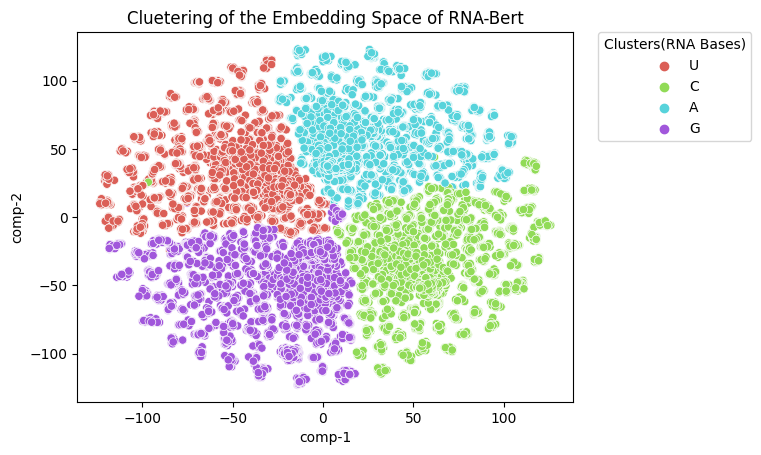

In [75]:
df = pd.DataFrame()
df["y"] = all_label
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
legend_labels = {0: 'A', 1: 'U', 2: 'C', 3: 'G'}
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="Cluetering of the Embedding Space of RNA-Bert") 
# Get the current legend handles and labels
handles, _ = plt.gca().get_legend_handles_labels()

# Update the legend labels based on the mapping
plt.legend(title='Clusters(RNA Bases)', handles=handles, labels=[legend_labels[label] for label in df['y'].unique()],
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()